<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#co2-emmisions-and-life-expectancy-unsupervised-machine-learning-clustering" data-toc-modified-id="co2-emmisions-and-life-expectancy-unsupervised-machine-learning-clustering-1">co2 emmisions and life expectancy unsupervised machine learning clustering</a></span><ul class="toc-item"><li><span><a href="#01-Import-libraries-and-data" data-toc-modified-id="01-Import-libraries-and-data-1.1">01 Import libraries and data</a></span></li><li><span><a href="#02-Data-wrangling" data-toc-modified-id="02-Data-wrangling-1.2">02 Data wrangling</a></span></li><li><span><a href="#03-Data-consistency-checks" data-toc-modified-id="03-Data-consistency-checks-1.3">03 Data consistency checks</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.3.1">Missing values</a></span></li><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-1.3.2">Check for duplicates</a></span></li></ul></li><li><span><a href="#04-The-elbow-technique" data-toc-modified-id="04-The-elbow-technique-1.4">04 The elbow technique</a></span></li><li><span><a href="#05-k-means-clustering" data-toc-modified-id="05-k-means-clustering-1.5">05 k-means clustering</a></span></li><li><span><a href="#06-Scatterplots-comparing-differnt-variables" data-toc-modified-id="06-Scatterplots-comparing-differnt-variables-1.6">06 Scatterplots comparing differnt variables</a></span><ul class="toc-item"><li><span><a href="#Scatterplot:-GDP-per-Capita-vs-Life-Expectancy" data-toc-modified-id="Scatterplot:-GDP-per-Capita-vs-Life-Expectancy-1.6.1">Scatterplot: GDP per Capita vs Life Expectancy</a></span></li><li><span><a href="#Scatterplot:-Life-Expectancy-vs-population" data-toc-modified-id="Scatterplot:-Life-Expectancy-vs-population-1.6.2">Scatterplot: Life Expectancy vs population</a></span></li><li><span><a href="#Scatterplot:-Life-Expectancy-vs-co2-per-capita" data-toc-modified-id="Scatterplot:-Life-Expectancy-vs-co2-per-capita-1.6.3">Scatterplot: Life Expectancy vs co2 per capita</a></span></li></ul></li><li><span><a href="#07-Descriptive-Statics-of-clusters" data-toc-modified-id="07-Descriptive-Statics-of-clusters-1.7">07 Descriptive Statics of clusters</a></span></li></ul></li></ul></div>

# co2 emmisions and life expectancy unsupervised machine learning clustering

## 01 Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# command matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Create path

path = r'C:\Users\rober_fjs0dbr\OneDrive\Documents\CF Coursework\Advanced Analytics & Dashboard Design\rc_final_project'

In [4]:
# import carbon data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'carbon_life_full_v03.csv'))

In [5]:
df.head()

,Unnamed: 0,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,...,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag
0,0,Afghanistan,1990,50.331001,NaN,10694804,NaN,1.306598e+10,NaN,1221.713273,...,2024000.0,NaN,0.189251,NaN,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
1,1,Afghanistan,1991,50.999001,1.327212,10745168,0.470920,1.204736e+10,-7.795983,1121.188803,...,1914000.0,-5.434783,0.178127,-5.878022,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
2,2,Afghanistan,1992,51.640999,1.258845,12057436,12.212634,1.267754e+10,5.230828,1051.429078,...,1482000.0,-22.570533,0.122912,-30.997549,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
3,3,Afghanistan,1993,52.256001,1.190917,14003764,16.142138,9.834581e+09,-22.425156,702.281258,...,1487000.0,0.337382,0.106186,-13.608116,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
4,4,Afghanistan,1994,52.841999,1.121400,15455560,10.367184,7.919857e+09,-19.469298,512.427706,...,1454000.0,-2.219233,0.094076,-11.404130,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita


## 02 Data wrangling

In [11]:
# Drop 'Unnamed: 0' column from df

df_cluster = df.drop(['Unnamed: 0', 'country', 'life_expectancy_flag', 'population_flag', 'gdp_flag', 'gdp_capita_flag', 'co2_production_flag', 'co2_per_capita_flag'], axis=1)

df_cluster.head()

,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita
0,1990,50.331001,NaN,10694804,NaN,1.306598e+10,NaN,1221.713273,NaN,2024000.0,NaN,0.189251,NaN
1,1991,50.999001,1.327212,10745168,0.470920,1.204736e+10,-7.795983,1121.188803,-8.228156,1914000.0,-5.434783,0.178127,-5.878022
2,1992,51.640999,1.258845,12057436,12.212634,1.267754e+10,5.230828,1051.429078,-6.221943,1482000.0,-22.570533,0.122912,-30.997549
3,1993,52.256001,1.190917,14003764,16.142138,9.834581e+09,-22.425156,702.281258,-33.206978,1487000.0,0.337382,0.106186,-13.608116
4,1994,52.841999,1.121400,15455560,10.367184,7.919857e+09,-19.469298,512.427706,-27.033834,1454000.0,-2.219233,0.094076,-11.404130


In [12]:
df_cluster.describe()

,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita
count,4691.000000,4691.000000,4690.000000,4.691000e+03,4690.000000,4.691000e+03,4690.000000,4691.000000,4690.000000,4.691000e+03,4690.000000,4691.000000,4690.000000
mean,2004.016841,68.204841,0.084967,3.951227e+07,70.226759,4.510854e+11,22.422824,13646.447468,4.639735,1.720968e+08,inf,4.938853,inf
std,8.362467,10.040588,3.680540,1.388592e+08,3612.041067,1.507337e+12,562.771698,15841.659142,65.163476,7.127779e+08,NaN,8.506195,NaN
min,1990.000000,26.172001,-54.015979,6.828100e+04,-99.841847,2.571720e+08,-99.959980,365.696469,-97.855035,0.000000e+00,-100.000000,0.000000,-100.000000
25%,1997.000000,61.179501,0.169310,3.619266e+06,0.471030,1.778951e+10,1.754786,2635.831263,0.416151,3.105500e+06,-2.303857,0.527883,-3.432759
50%,2004.000000,70.945999,0.350286,9.330632e+06,1.412886,5.530370e+10,4.140315,7940.043566,2.655741,1.681800e+07,2.207314,2.531885,0.939726
75%,2011.000000,75.683998,0.661984,2.669122e+07,2.484223,2.707835e+11,6.736978,18914.544291,5.137165,7.511400e+07,7.424662,6.953005,5.923646
max,2018.000000,84.934143,38.642072,1.417069e+09,246521.247709,1.815160e+13,30088.083729,166150.487755,3027.309285,1.035388e+10,inf,367.927705,inf


In [13]:
# reduce population, gdp, and co2 to standardize values

df_cluster['population'] = df_cluster['population']/1000000

df_cluster['gdp'] = df_cluster['gdp']/1000000000

df_cluster['co2'] = df_cluster['co2']/1000000

df_cluster.describe()

,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita
count,4691.000000,4691.000000,4690.000000,4691.000000,4690.000000,4691.000000,4690.000000,4691.000000,4690.000000,4691.000000,4690.000000,4691.000000,4690.000000
mean,2004.016841,68.204841,0.084967,39.512274,70.226759,451.085448,22.422824,13646.447468,4.639735,172.096849,inf,4.938853,inf
std,8.362467,10.040588,3.680540,138.859246,3612.041067,1507.337322,562.771698,15841.659142,65.163476,712.777871,NaN,8.506195,NaN
min,1990.000000,26.172001,-54.015979,0.068281,-99.841847,0.257172,-99.959980,365.696469,-97.855035,0.000000,-100.000000,0.000000,-100.000000
25%,1997.000000,61.179501,0.169310,3.619266,0.471030,17.789509,1.754786,2635.831263,0.416151,3.105500,-2.303857,0.527883,-3.432759
50%,2004.000000,70.945999,0.350286,9.330632,1.412886,55.303700,4.140315,7940.043566,2.655741,16.818000,2.207314,2.531885,0.939726
75%,2011.000000,75.683998,0.661984,26.691221,2.484223,270.783500,6.736978,18914.544291,5.137165,75.114000,7.424662,6.953005,5.923646
max,2018.000000,84.934143,38.642072,1417.069440,246521.247709,18151.600000,30088.083729,166150.487755,3027.309285,10353.877000,inf,367.927705,inf


## 03 Data consistency checks

### Missing values

In [14]:
### Check for missing values

df_cluster.isnull().sum()

year                     0
life_expectancy          0
pct_change_life          1
population               0
pct_change_pop           1
gdp                      0
pct_change_gdp           1
gdp_per_capita           0
pct_change_gdp_capita    1
co2                      0
pct_change_co2           1
co2_per_capita           0
pct_change_co2_capita    1
dtype: int64

Missing values represent first year of data for % change columns. They will be removed

In [19]:
df_cluster = df_cluster.drop(['pct_change_life', 'pct_change_pop', 'pct_change_gdp', 'pct_change_gdp_capita', 'pct_change_co2', 'pct_change_co2_capita'], axis=1)

### Check for duplicates

In [20]:
dups = df.duplicated()

In [21]:
dups.shape

(4691,)

No duplicates present

## 04 The elbow technique

In [22]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [23]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1190124117031.8484,
 -419503780550.71893,
 -255029060142.74902,
 -159976488921.9922,
 -101546993548.30623,
 -68035366846.725555,
 -52288172592.18717,
 -41927268675.80506,
 -35122755110.970665]

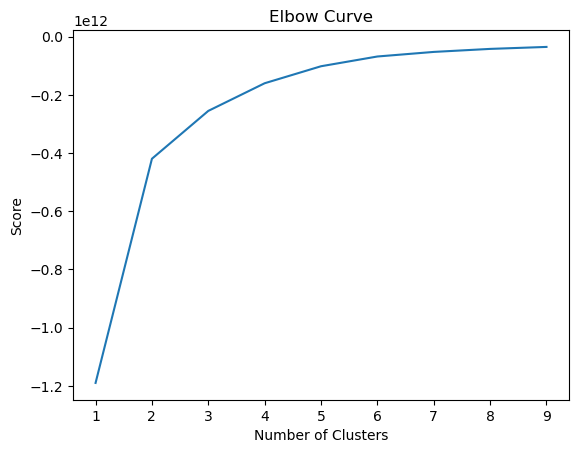

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Above we can see that the last large jump in score between 3 and 4 on the x-axis. This means that the optimal count of clusters is 4.

## 05 k-means clustering

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [28]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

KMeans(n_clusters=4)

In [29]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

In [30]:
df_cluster.head()

,year,life_expectancy,population,gdp,gdp_per_capita,co2,co2_per_capita,clusters
0,1990,50.331001,10.694804,13.065984,1221.713273,2.024,0.189251,2
1,1991,50.999001,10.745168,12.047362,1121.188803,1.914,0.178127,2
2,1992,51.640999,12.057436,12.677539,1051.429078,1.482,0.122912,2
3,1993,52.256001,14.003764,9.834581,702.281258,1.487,0.106186,2
4,1994,52.841999,15.455560,7.919857,512.427706,1.454,0.094076,2


In [31]:
df_cluster['clusters'].value_counts()

2    2822
0    1144
3     659
1      66
Name: clusters, dtype: int64

## 06 Scatterplots comparing differnt variables

### Scatterplot: GDP per Capita vs Life Expectancy

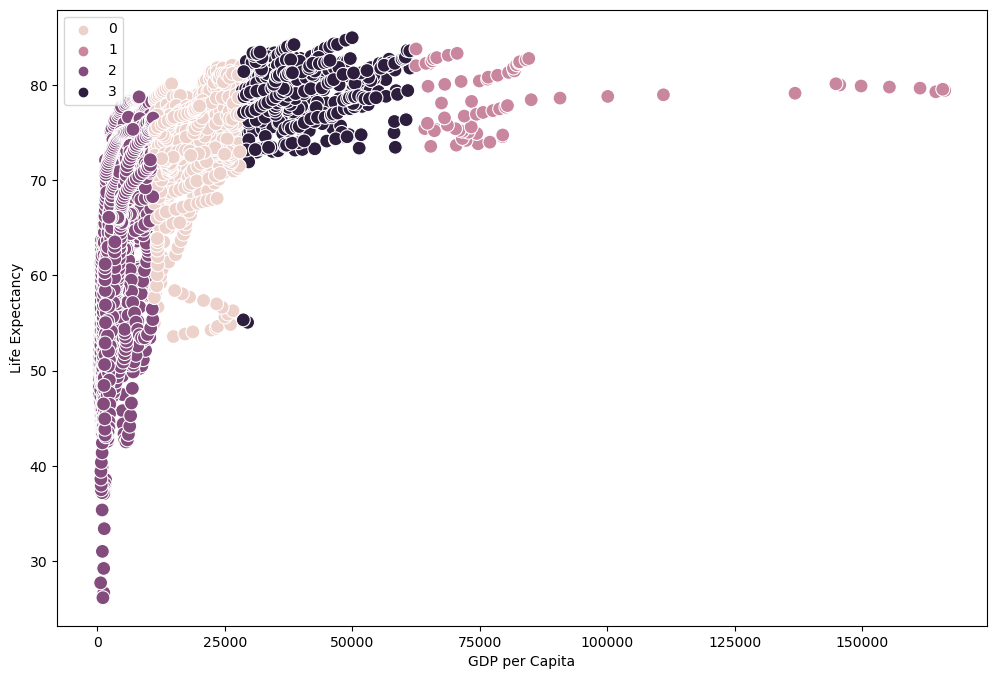

In [34]:
# Plot the clusters for the "life_expectancy" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['gdp_per_capita'], y=df_cluster['life_expectancy'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('GDP per Capita') 
plt.ylabel('Life Expectancy') 
plt.show()

### Scatterplot: Life Expectancy vs population

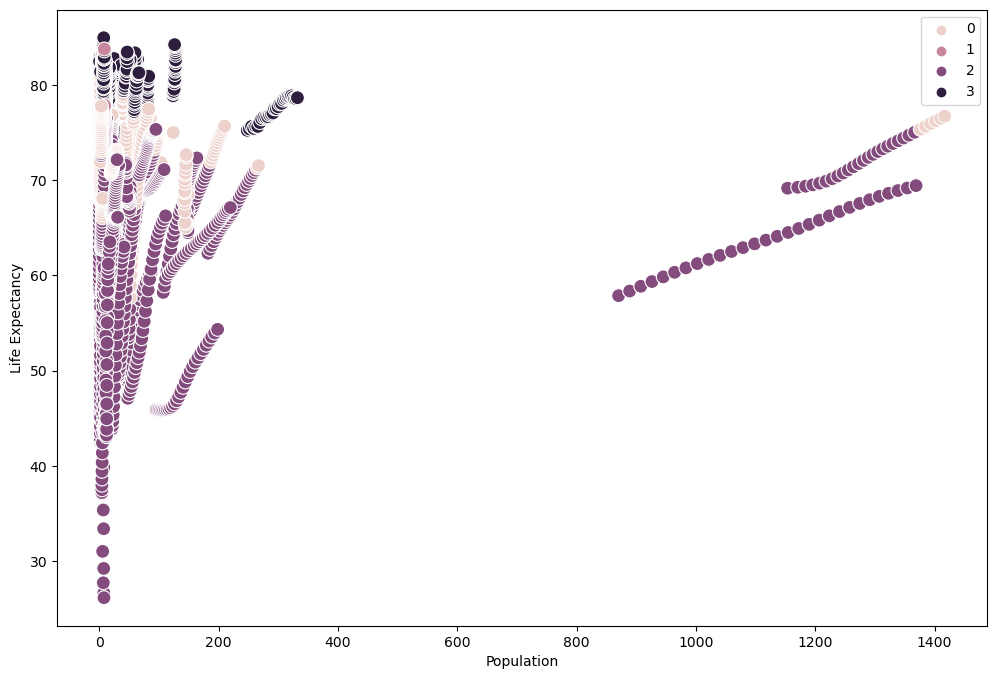

In [35]:
# Plot the clusters for the "life_expectancy" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['population'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Population') 
plt.ylabel('Life Expectancy') 
plt.show()

### Scatterplot: Life Expectancy vs co2 per capita

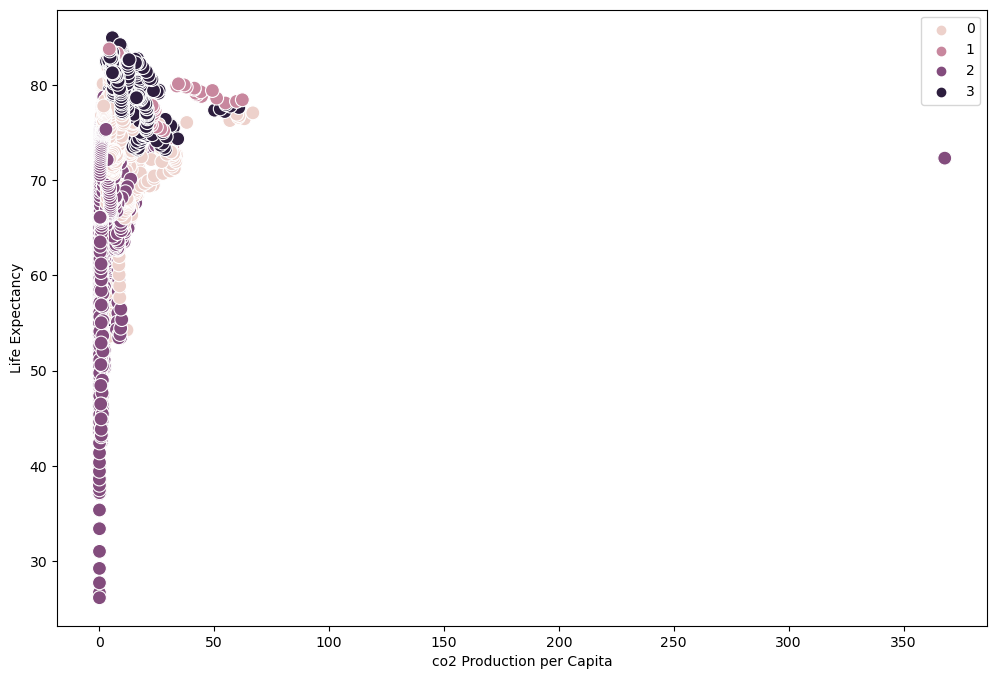

In [36]:
# Plot the clusters for the "life_expectancy" and "co2_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['co2_per_capita'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('co2 Production per Capita') 
plt.ylabel('Life Expectancy') 
plt.show()

An outlier in the scatterplot plot is making it difficule to make any observations. I will try viewing this again after removing the outliers from co2 production per capita.

In [37]:
#create a function to find outliers using IQR

for x in ['co2_per_capita']:
    q75,q25 = np.percentile(df_cluster.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_cluster.loc[df_cluster[x] < min,x] = np.nan
    df_cluster.loc[df_cluster[x] > max,x] = np.nan

In [38]:
df_cluster.isnull().sum()

year                 0
life_expectancy      0
population           0
gdp                  0
gdp_per_capita       0
co2                  0
co2_per_capita     251
clusters             0
dtype: int64

251 outliers found in 'co2_per_capita'

In [40]:
# drop null from life_expectancy and gdp_per_capita variables

df_cluster = df_cluster.dropna(subset=['co2_per_capita'])

df_cluster.isnull().sum()

year               0
life_expectancy    0
population         0
gdp                0
gdp_per_capita     0
co2                0
co2_per_capita     0
clusters           0
dtype: int64

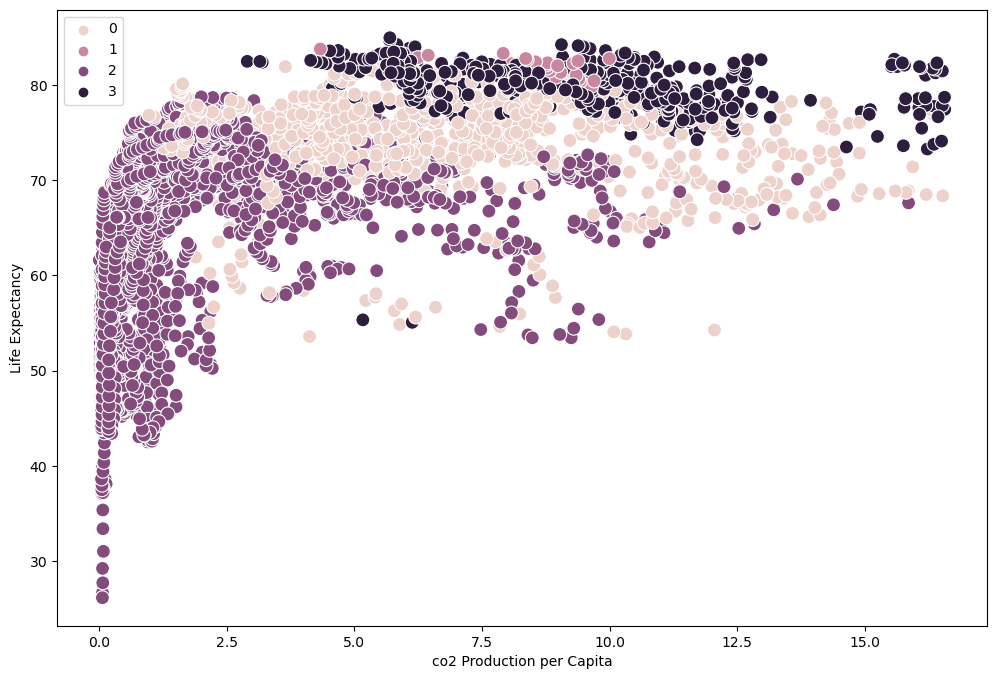

In [41]:
# Plot the clusters for the "life_expectancy" and "co2_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['co2_per_capita'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('co2 Production per Capita') 
plt.ylabel('Life Expectancy') 
plt.show()

When observing the above scatterplot, a countries ability to produce co2 does not appear to associated with that country having a medium to high life expectancy on a per capita basis. But the majority of countries with low life expectancies tend to be low carbon producers on a per capita basis.

## 07 Descriptive Statics of clusters

In [42]:
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'dark pink'
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'pink'
df_cluster.loc[df_cluster['clusters'] == 3, 'cluster'] = 'dark purple'

In [43]:
df_cluster.groupby('cluster').agg({'year':['mean', 'median'], 
                         'life_expectancy':['mean', 'median'], 
                         'population':['mean', 'median'],
                          'gdp':['mean', 'median'],
                                  'gdp_per_capita':['mean', 'median'],
                                  'co2':['mean', 'median'],
                                  'co2_per_capita':['mean', 'median']})

year         life_expectancy            population  \
                    mean  median            mean     median       mean   
cluster                                                                  
dark pink    2012.750000  2013.5       81.848476  82.152439   5.291734   
dark purple  2006.343023  2007.0       79.857988  80.175610  30.819365   
pink         2005.934622  2007.0       74.131627  74.905998  29.973172   
purple       2002.732765  2002.0       62.961441  64.769001  45.376583   

                                gdp             gdp_per_capita                \
                median         mean      median           mean        median   
cluster                                                                        
dark pink     5.164141   386.618583  381.882500   73452.905861  73097.863638   
dark purple   8.943759  1142.270916  361.162500   37844.490677  36396.217957   
pink          7.531315   467.663301  132.035000   17727.526591  16657.273979   
purple       10.334803   214.936549   28.307039    4315.744965   3570.845481   

                    co2          co2_per_capita            
                   mean   median           mean    median  
cluster                                                    
dark pink     44.637917  44.6755       8.581707  8.888562  
dark purple  300.556488  68.7795       9.239199  9.306806  
pink         191.842597  49.2200       6.361763  5.908024  
purple        93.669031   5.8120       1.594602  0.789789

Based on the stats in the table above I would like to look at life expectancy over time.

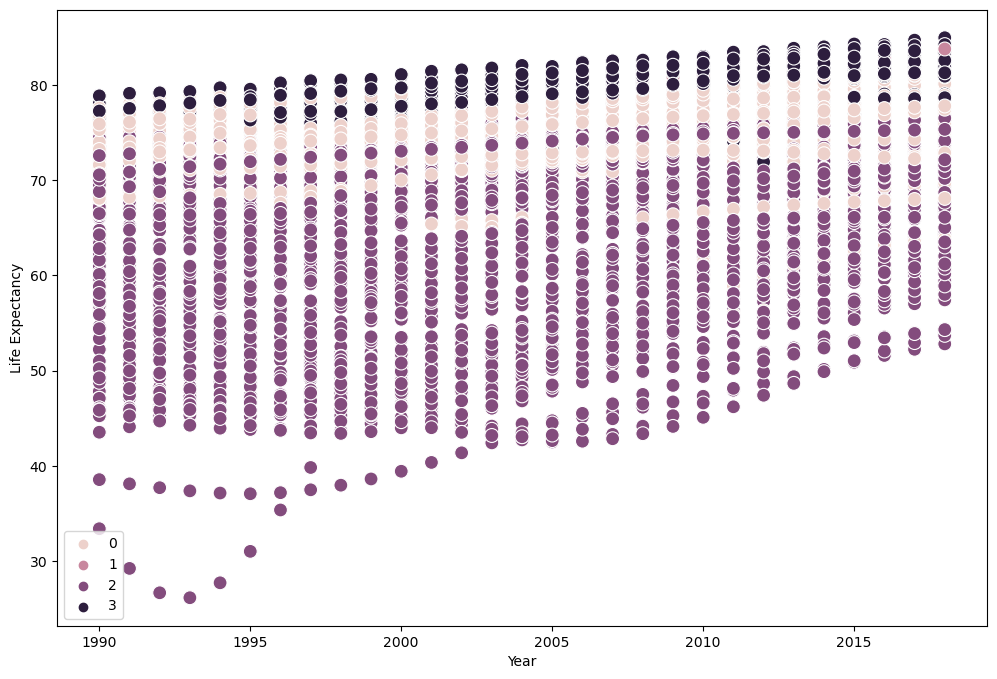

In [44]:
# Plot the clusters for the "life_expectancy" and "year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['year'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
plt.show()

Based on the above trend of life expectancy over time. I feel like the most influential variable may not be present in the data. Perhaps the availability of modern medicine and technology influence life expectancy more profoundly than a countries ability to produce energy or average wealth per person.

I feel like the next steps in this analysis is to group countries with similar attributes such as income level, co2 production, and gdp which I created earlier and perform this same process on subsets of the data set in order to see how the variables intereact. I would also like to see how these groups have changed over time using a time series analysis. 